In [1]:
import pandas as pd
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from stress_addition_model import sam_prediction, SAM_Setting
from data_formats import read_data, ExperimentData, DoseResponseSeries
from dose_reponse_fit import ModelPredictions
from scipy.stats import beta

In [14]:
files = os.listdir("migration/new_standard")

In [18]:
path = files[0]
new = pd.read_csv(f"migration/new_standard/{path}", index_col=0)
old = pd.read_csv(f"migration/old_standard/{path}", index_col=0)
marco = pd.read_csv(f"migration/python_marco/{path}")

data = read_data(new.path.iloc[0])
main_series = data.main_series
exp_name = new.exp_name.iloc[0]
exp_series = data.additional_stress[exp_name]

marco.columns

Index(['Concentration', 'Survival_A', 'Survival_B', 'SAM', 'EA', 'CA',
       'LC_SAM_Concentration', 'LC_SAM_Survival', 'Stress_A', 'Stress_B'],
      dtype='object')

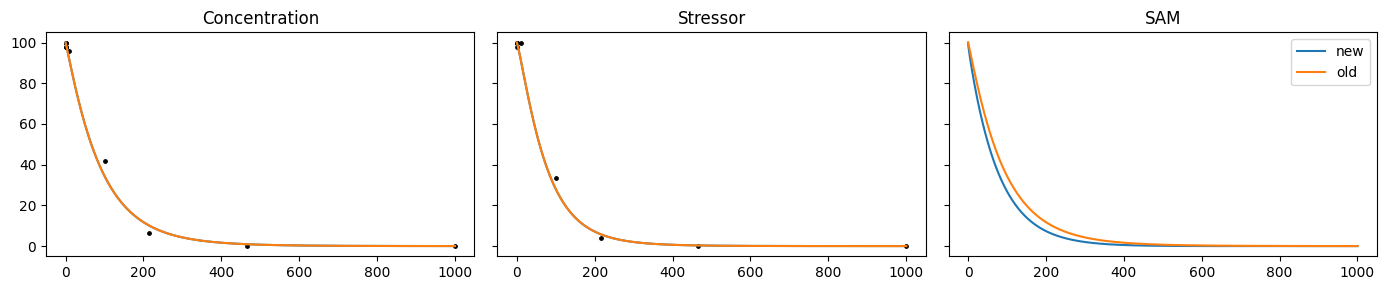

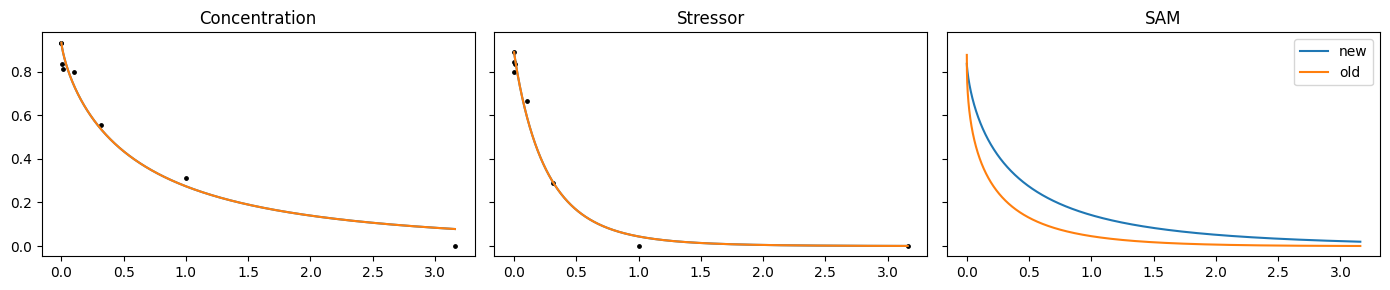

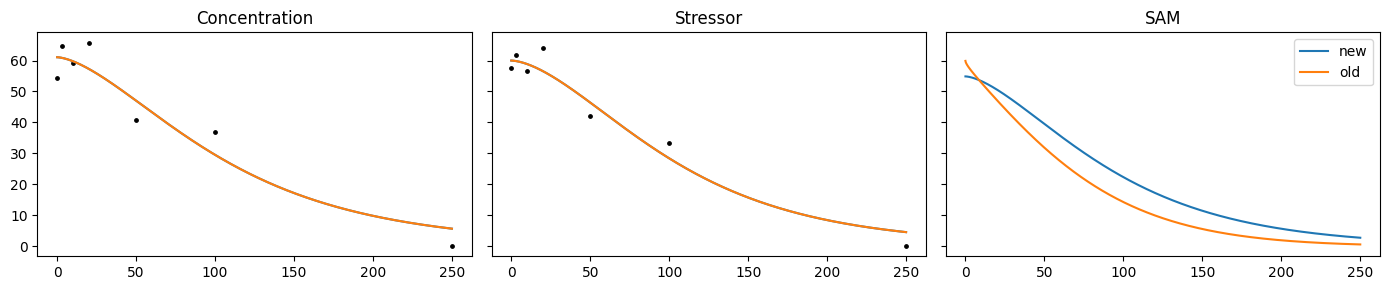

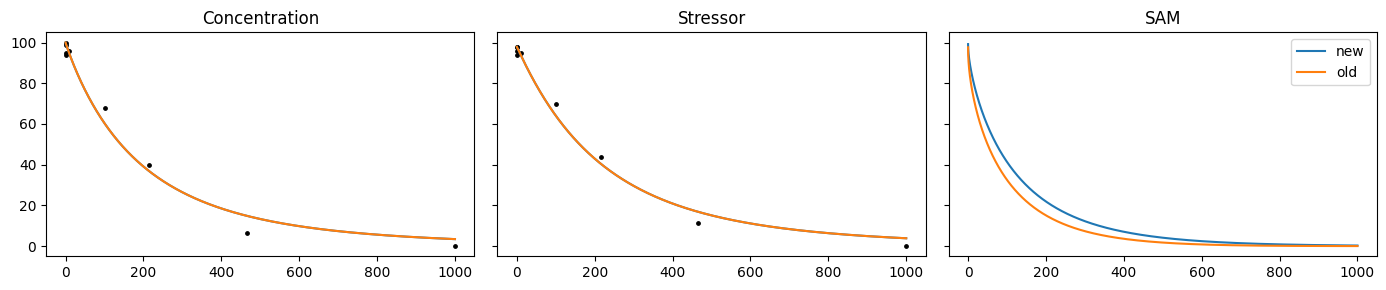

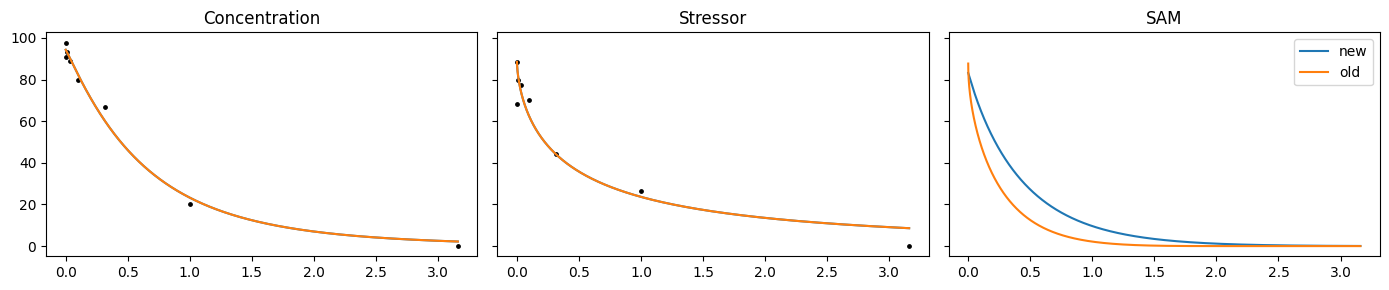

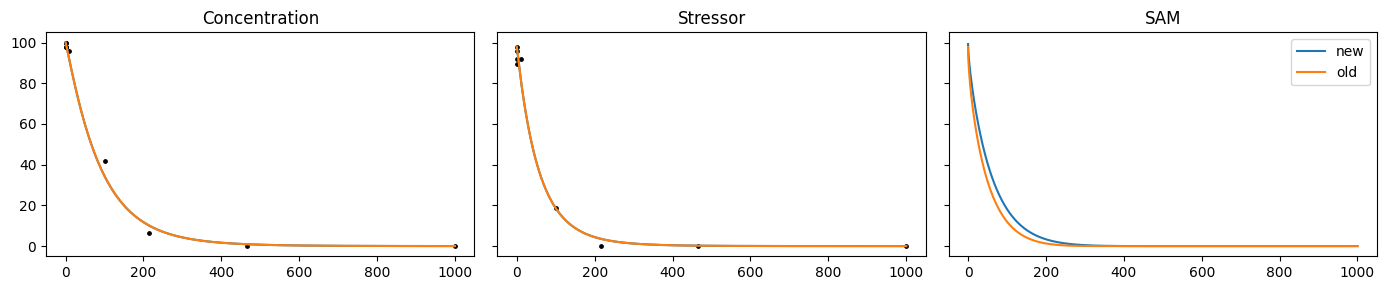

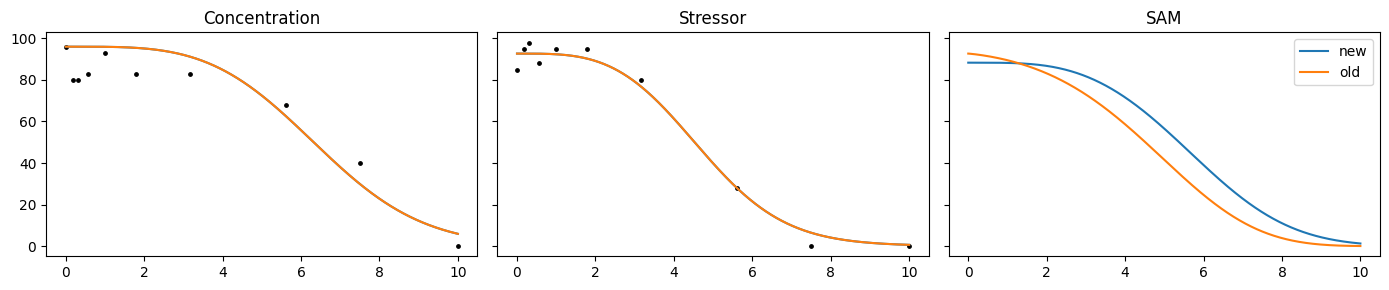

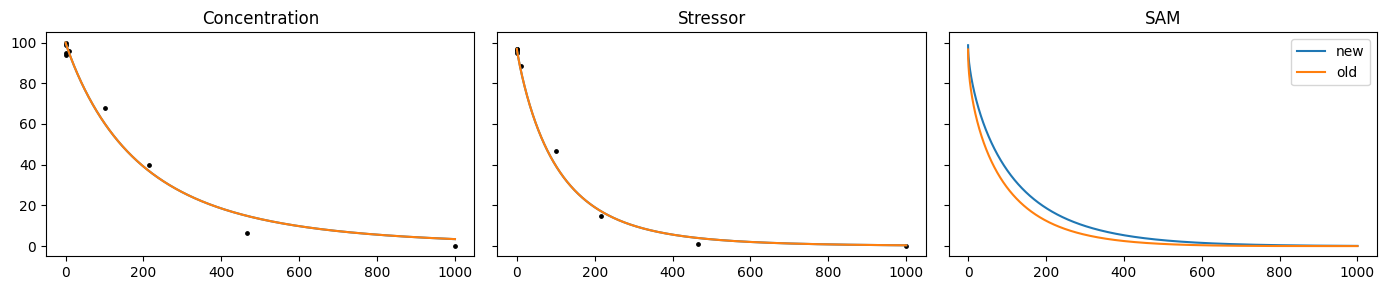

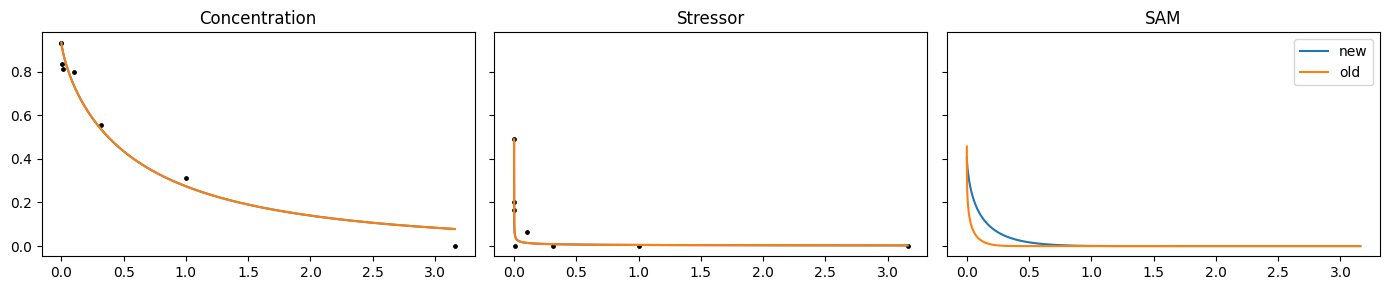

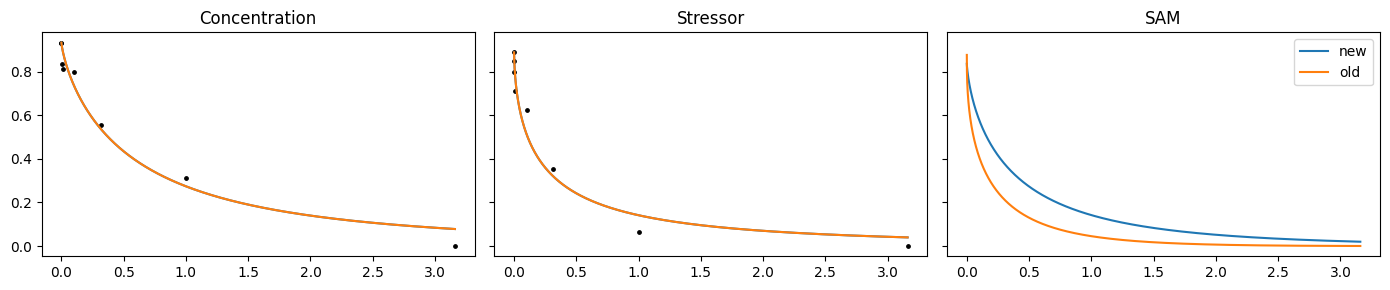

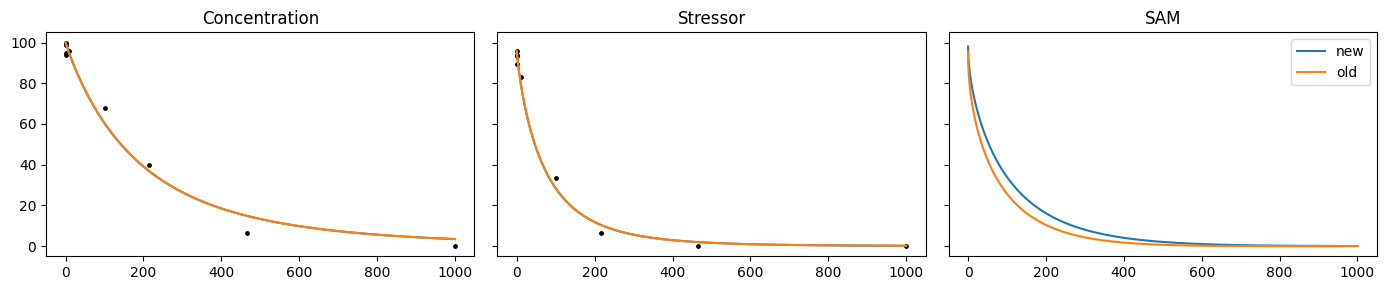

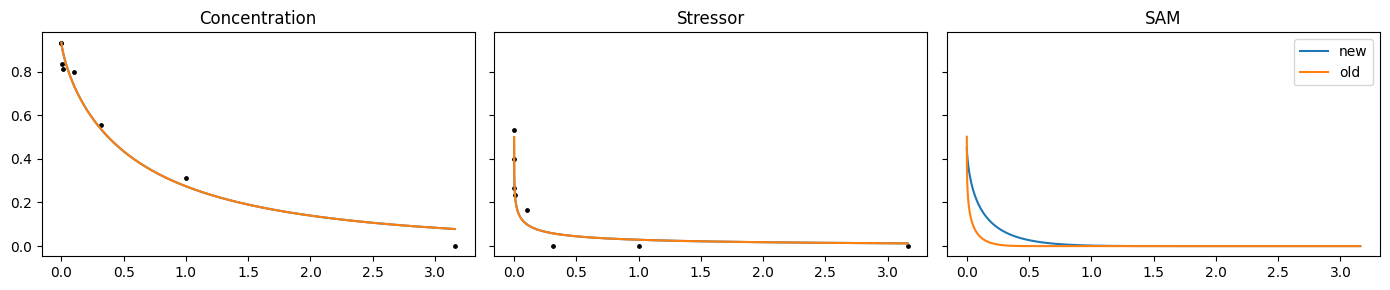

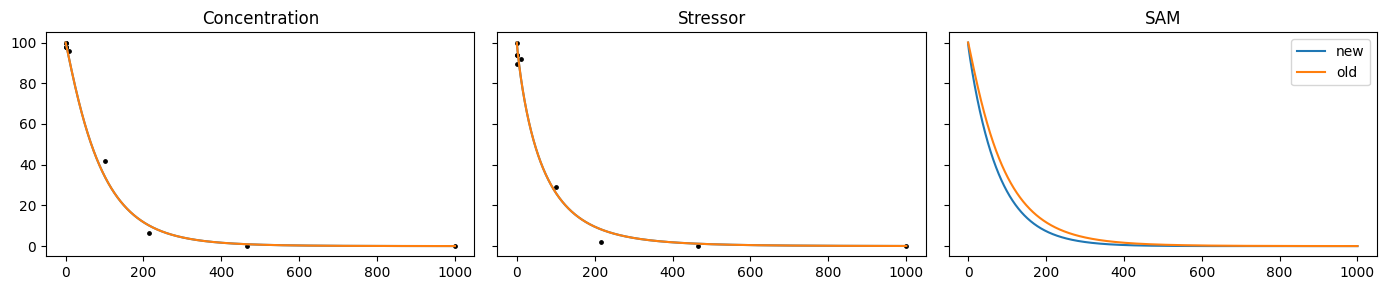

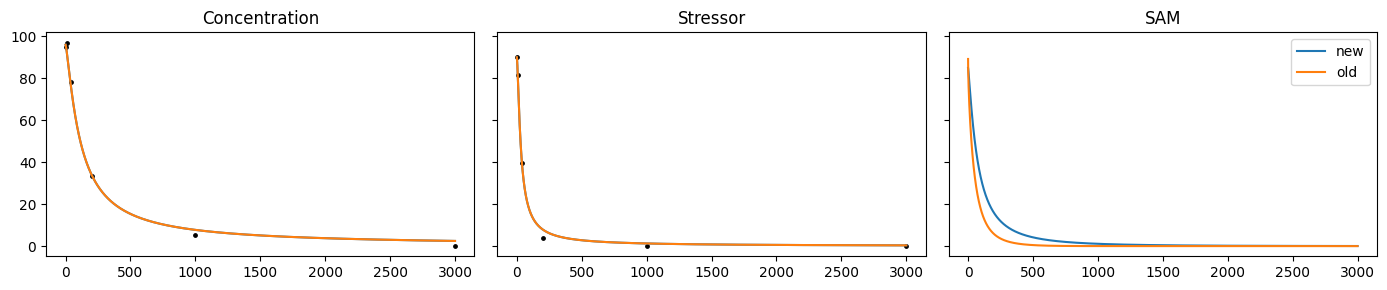

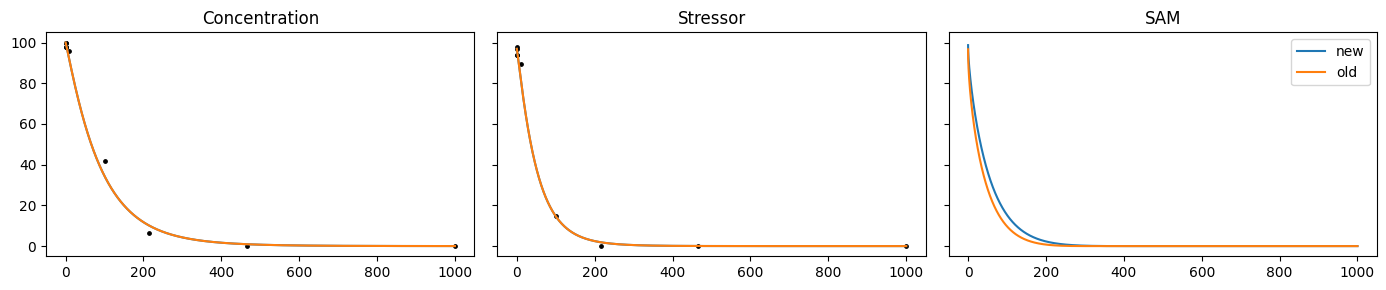

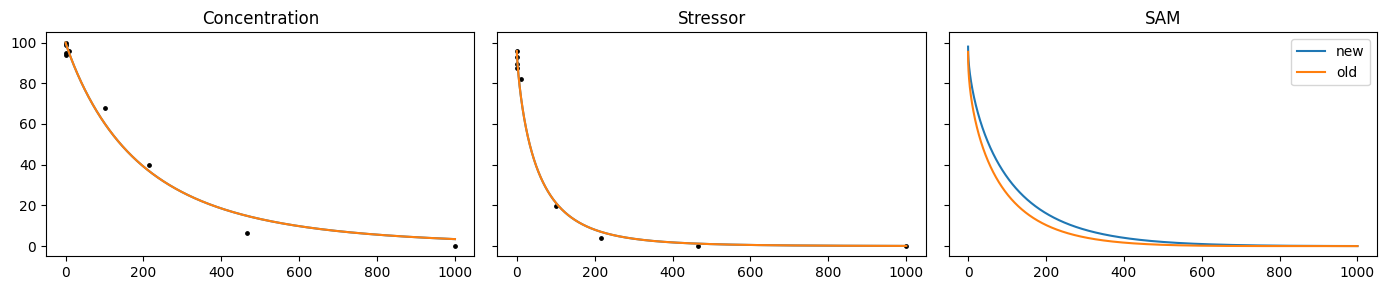

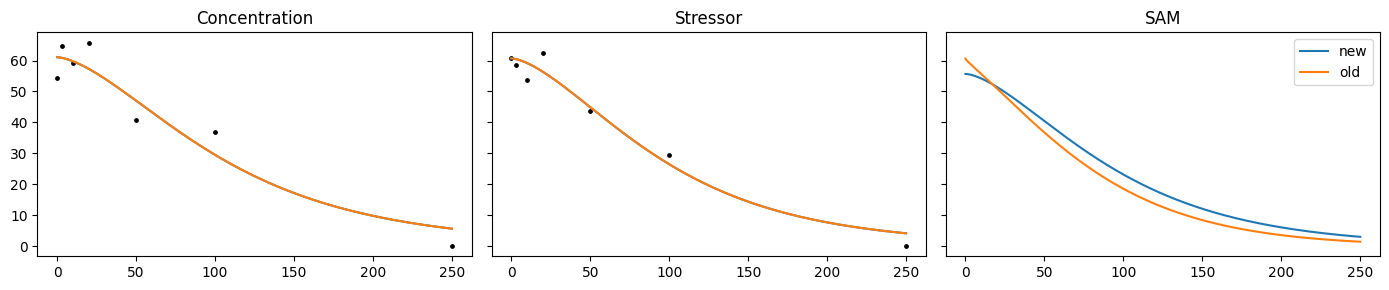

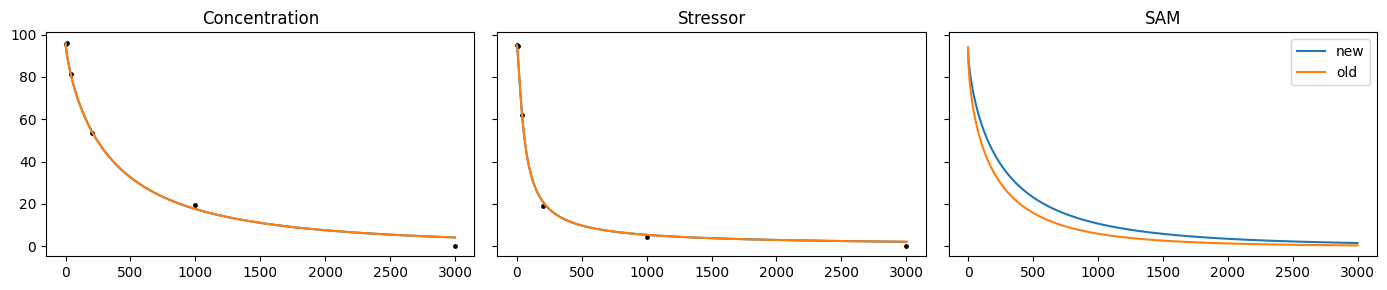

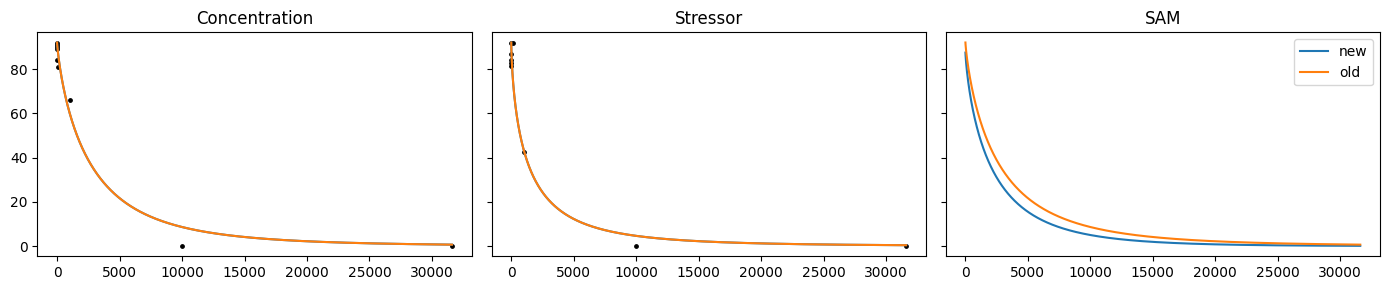

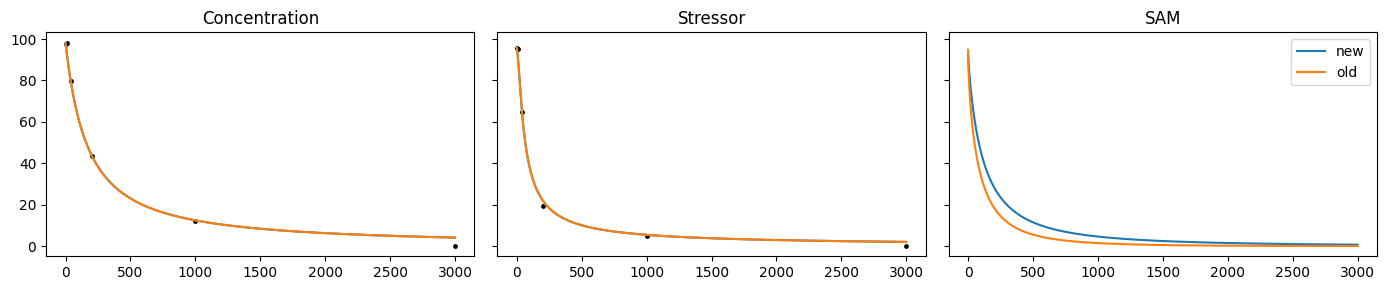

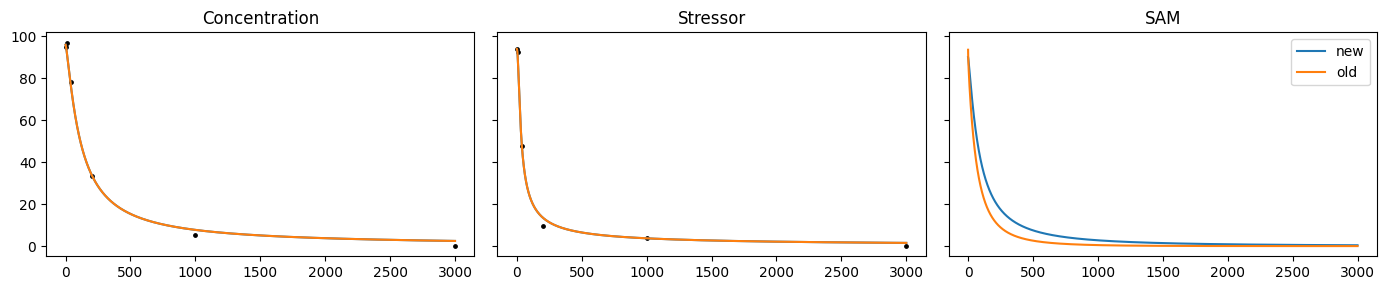

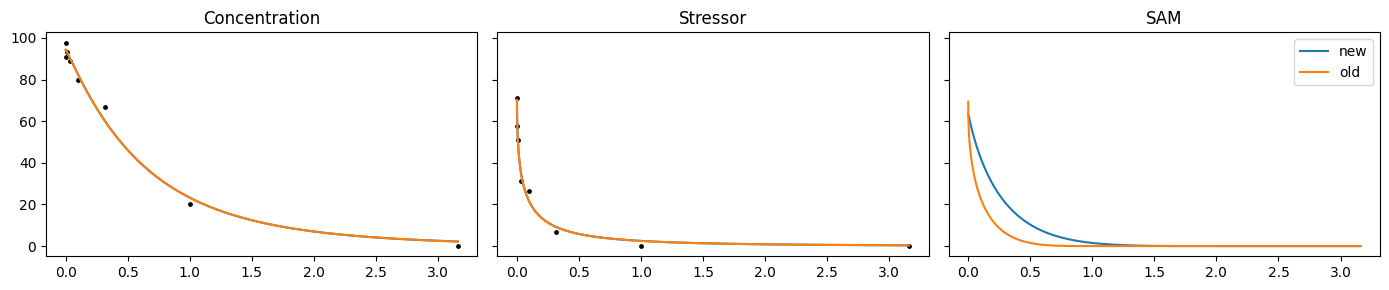

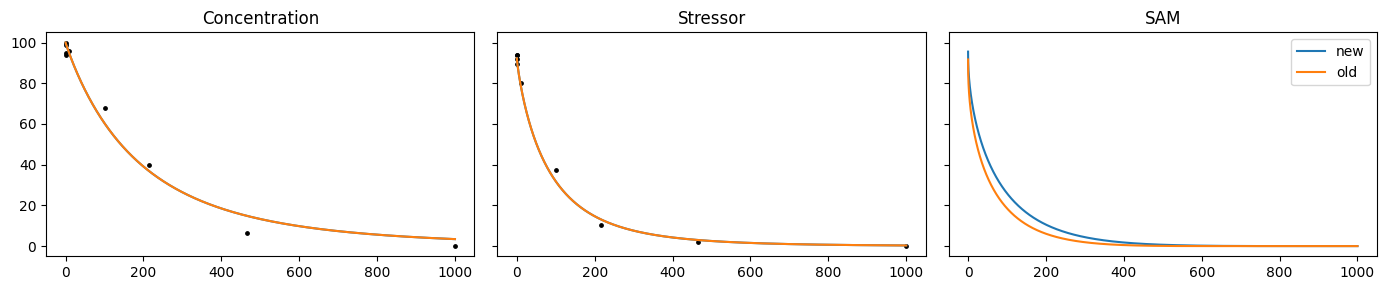

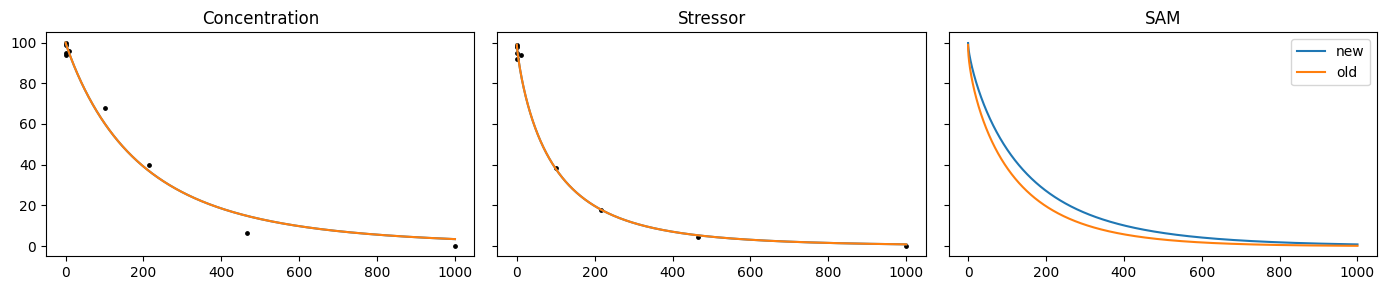

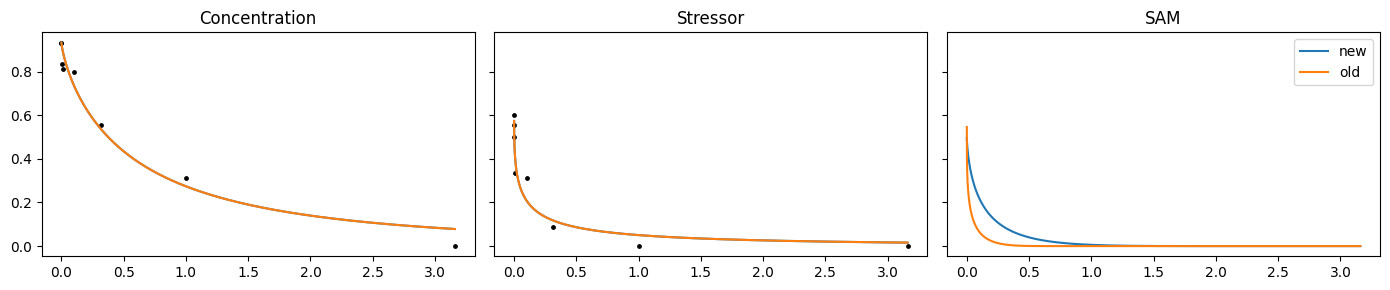

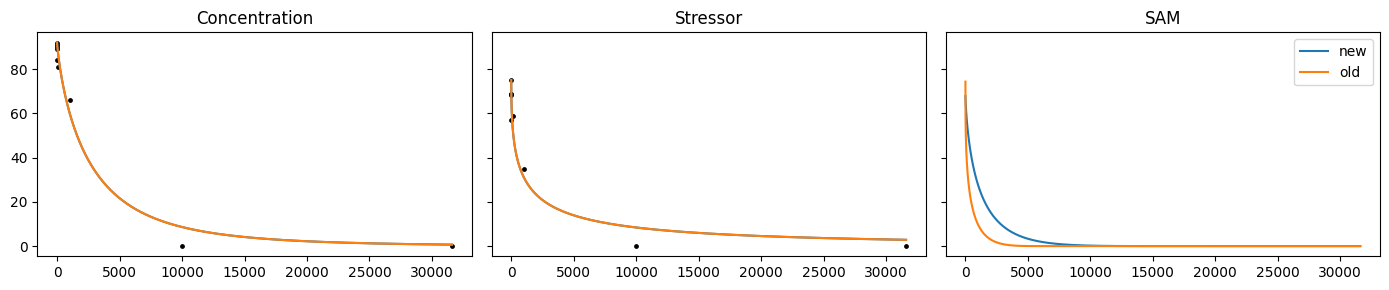

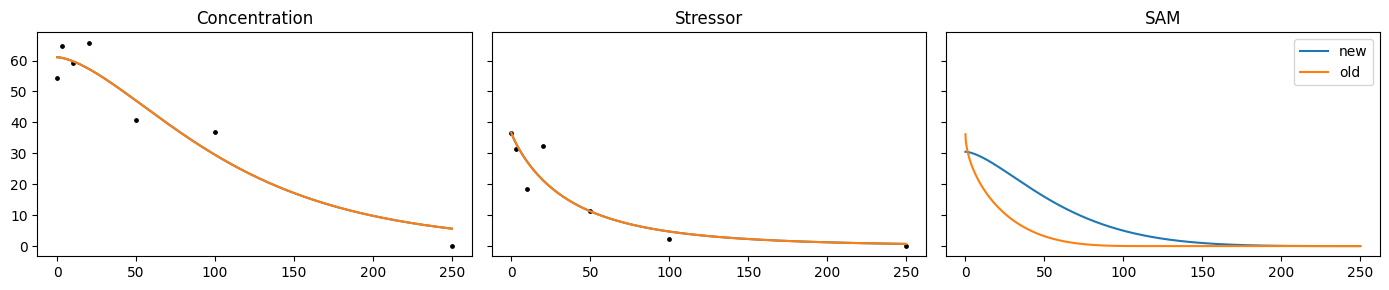

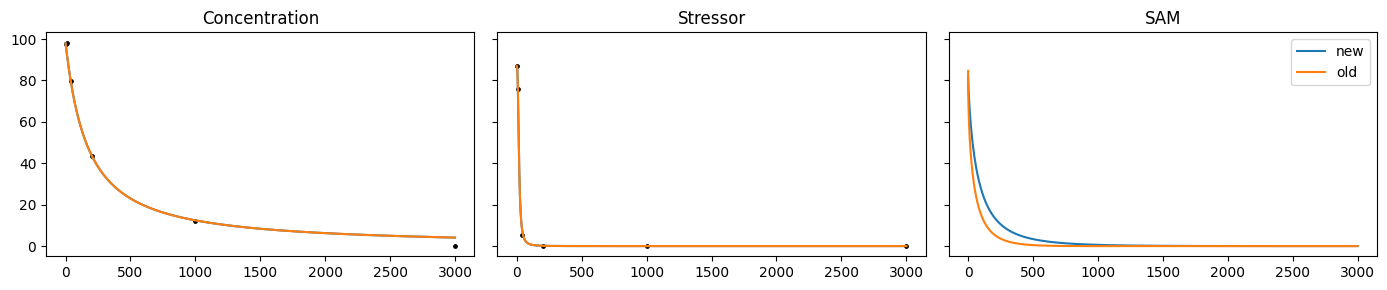

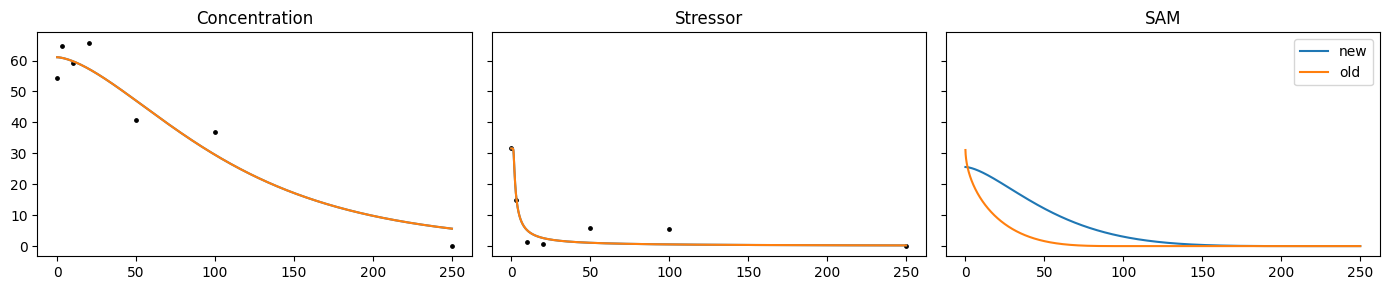

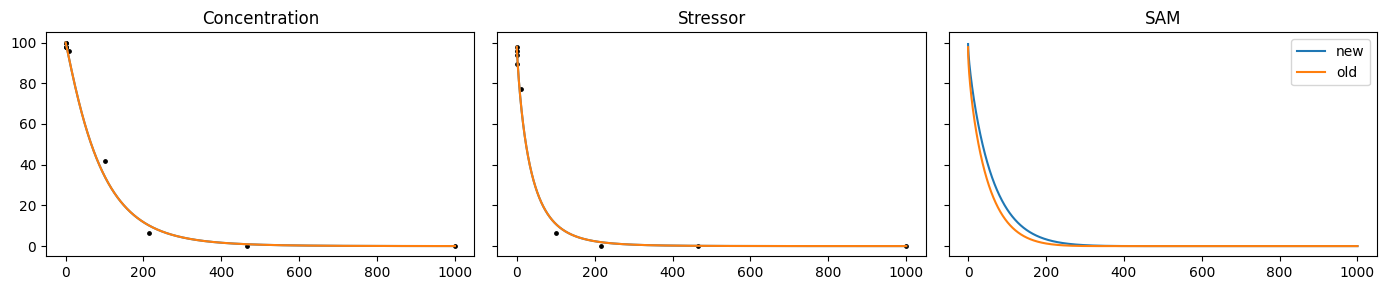

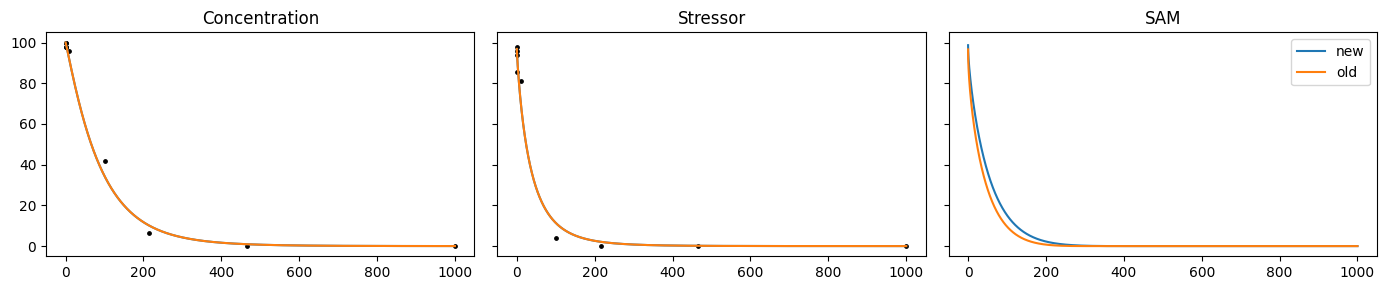

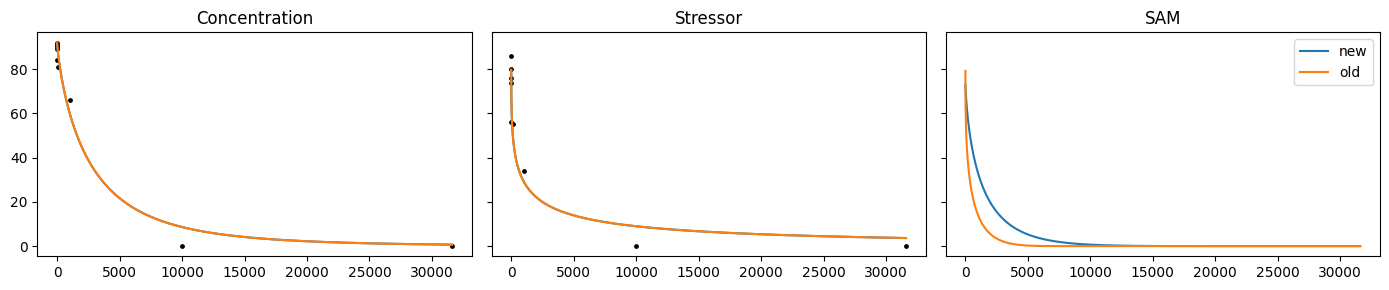

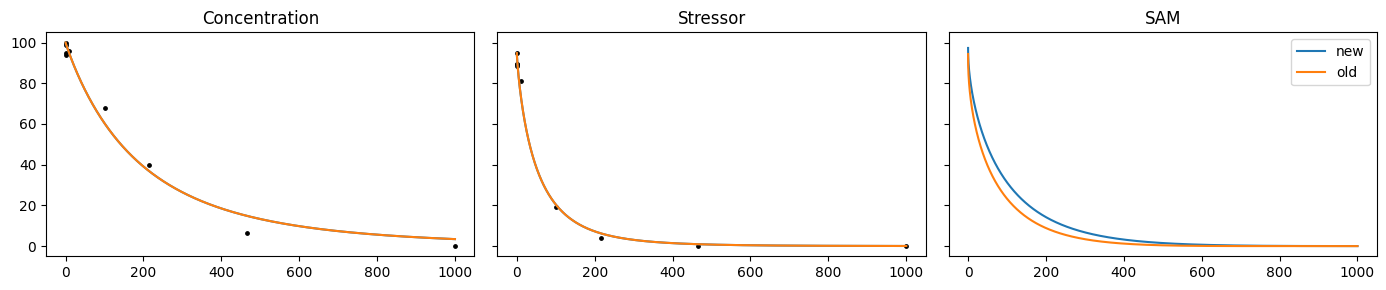

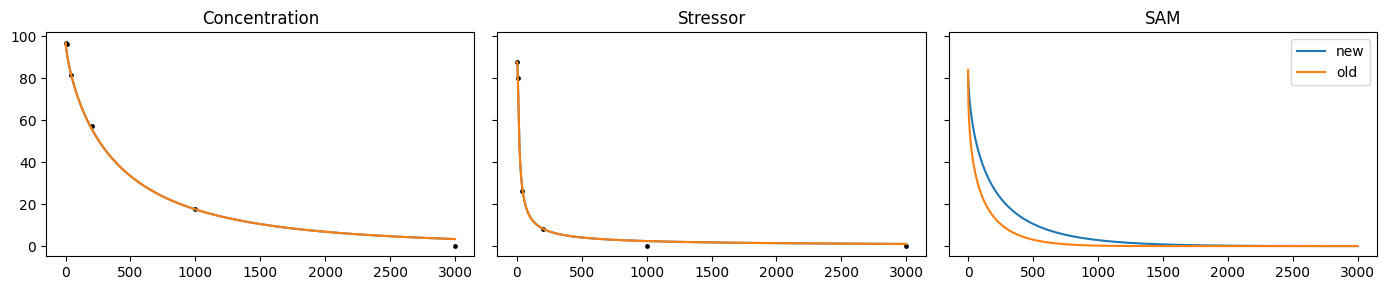

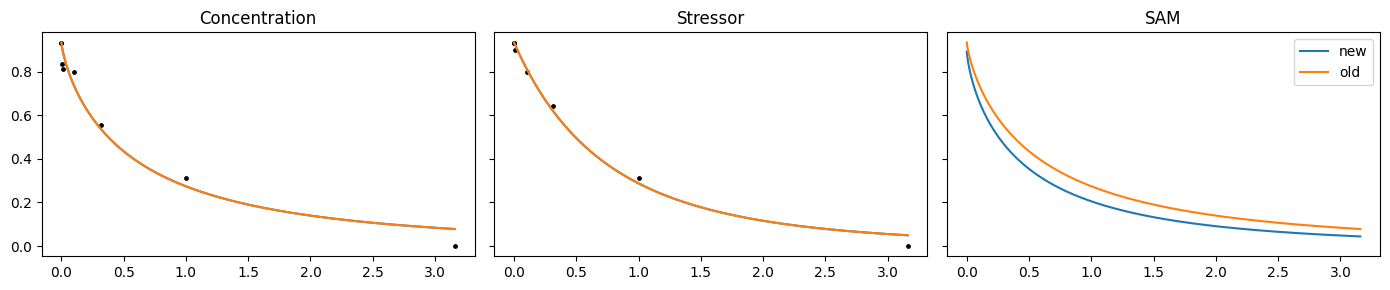

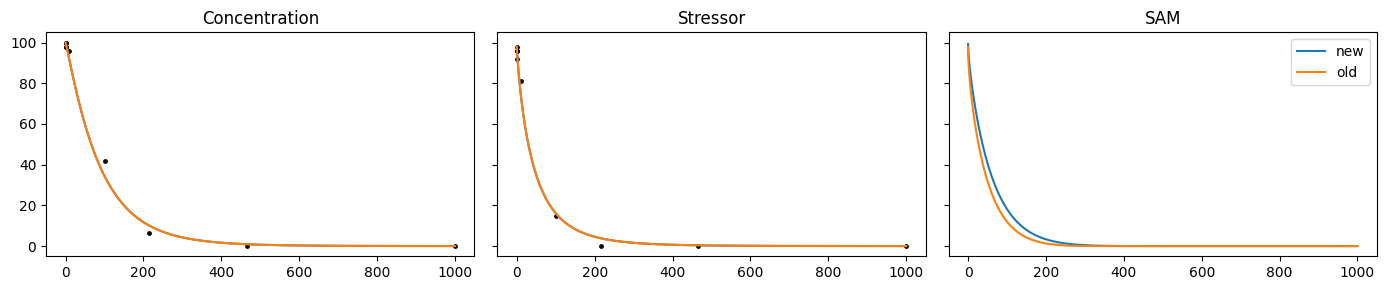

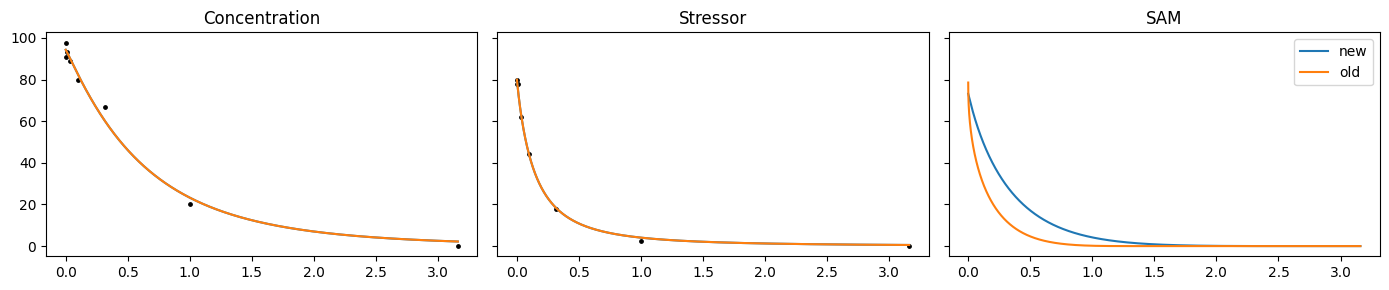

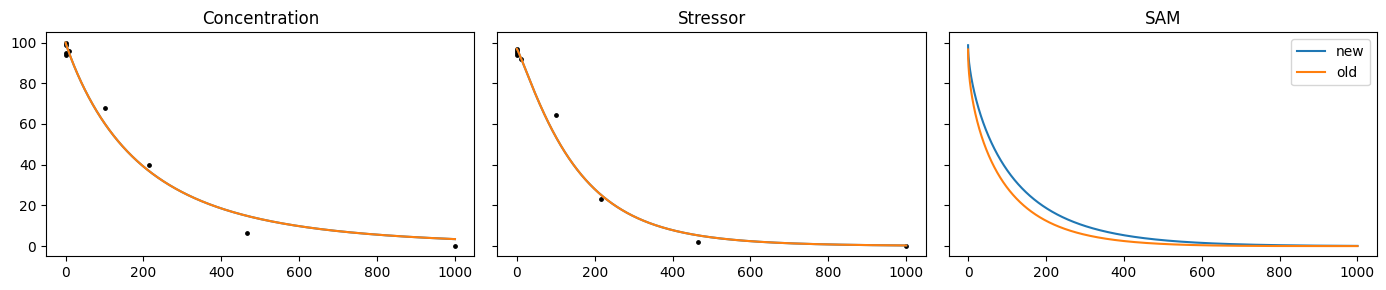

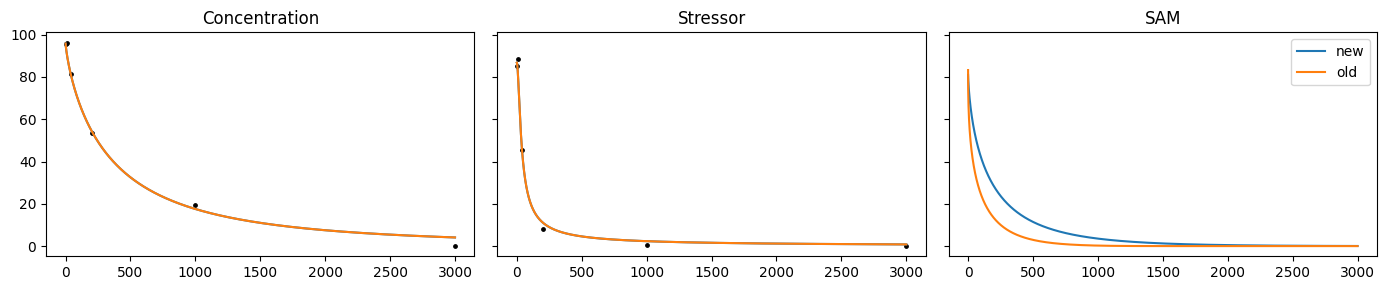

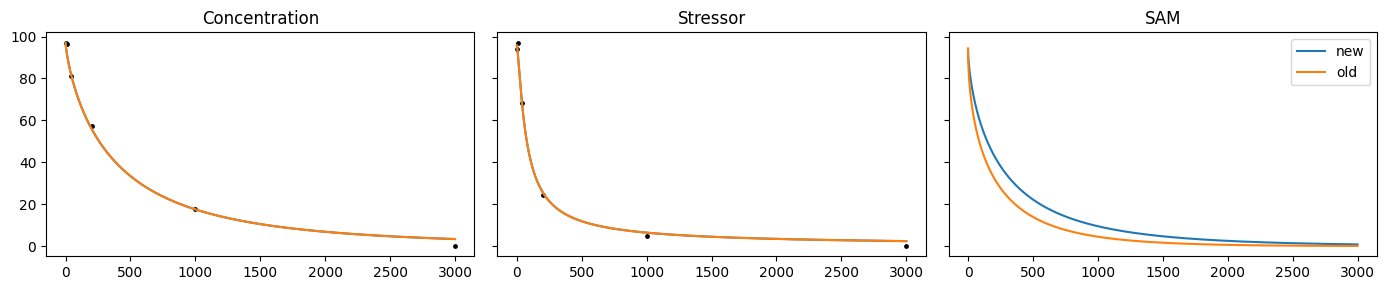

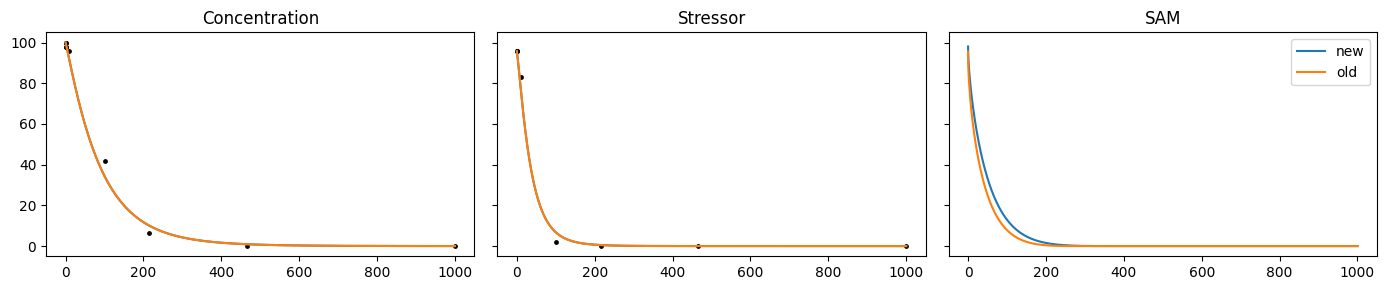

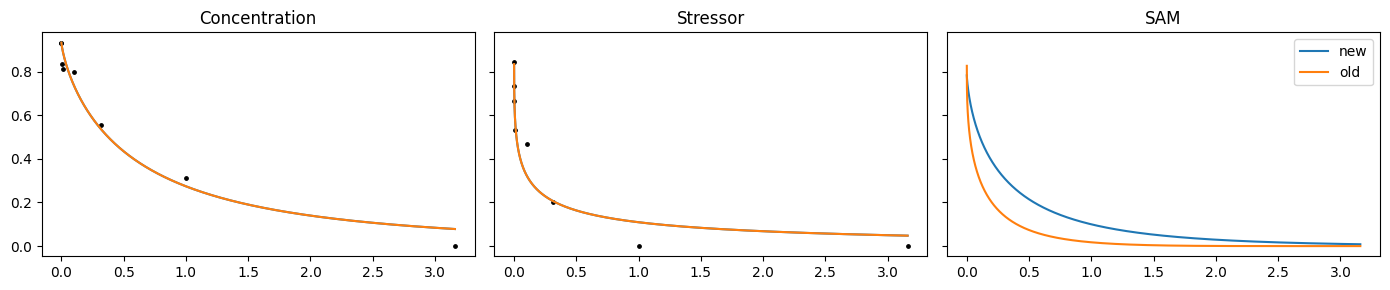

In [28]:
def plot_3(path):
    new = pd.read_csv(f"migration/new_standard/{path}", index_col=0)
    old = pd.read_csv(f"migration/old_standard/{path}", index_col=0)
    marco = pd.read_csv(f"migration/python_marco/{path}")

    data = read_data(new.path.iloc[0])
    main_series = data.main_series
    exp_name = new.exp_name.iloc[0]
    exp_series = data.additional_stress[exp_name]

    
    dfs = {"new":new, "old":old, }

    fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(14, 3))


    ax[0].scatter(main_series.concentration, main_series.survival_rate, c = "black", s= 6)
    for name, df in dfs.items():
        ax[0].plot(df.Concentration, df.Survival_A, label = name)
    ax[0].set_title("Concentration")

    ax[1].scatter(exp_series.concentration, exp_series.survival_rate, c = "black", s= 6)
    for name, df in dfs.items():
        ax[1].plot(df.Concentration, df.Survival_B, label = name)
    ax[1].set_title("Stressor")

    for name, df in dfs.items():
        ax[2].plot(df.Concentration, df.SAM, label = name)
    ax[2].set_title("SAM")
    plt.legend()
    plt.tight_layout()
    plt.show()


for p in files:
    plot_3(p)

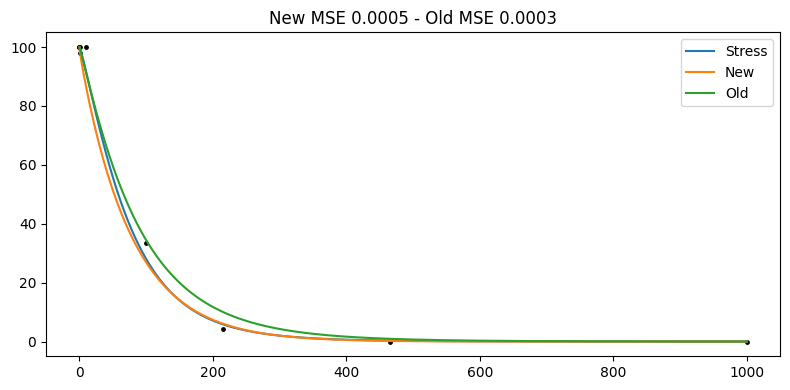

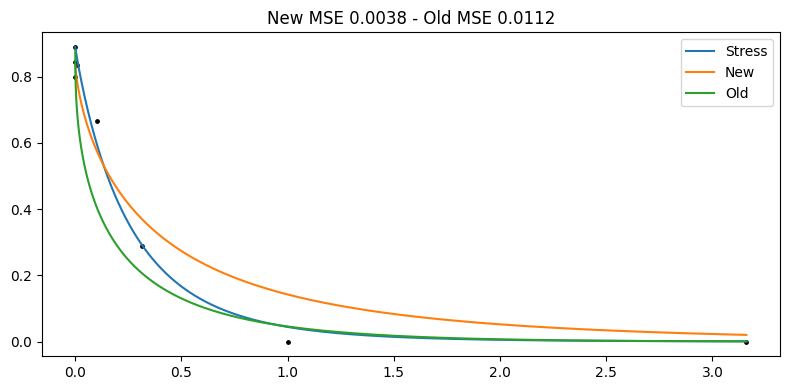

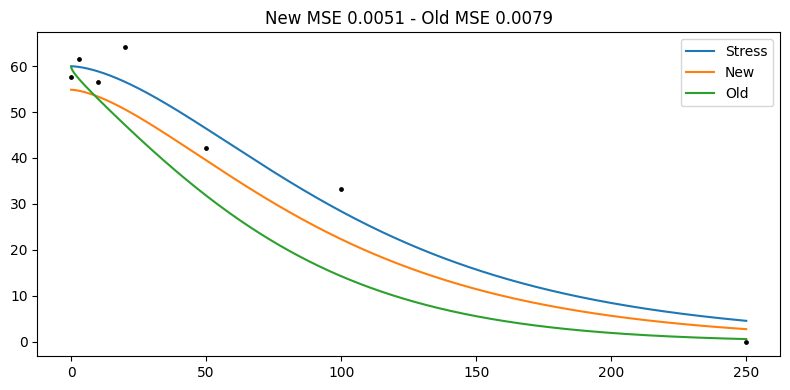

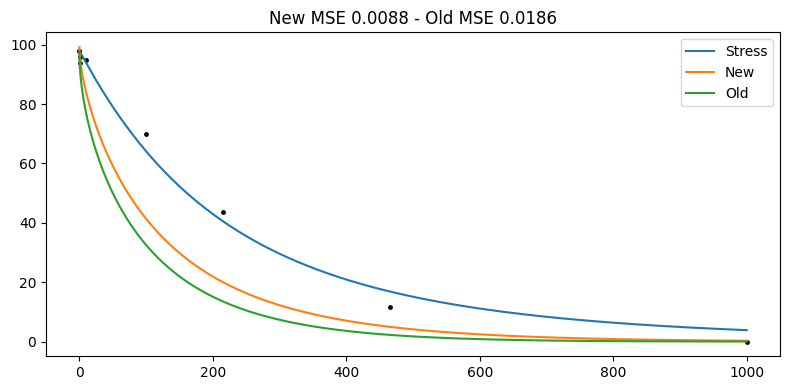

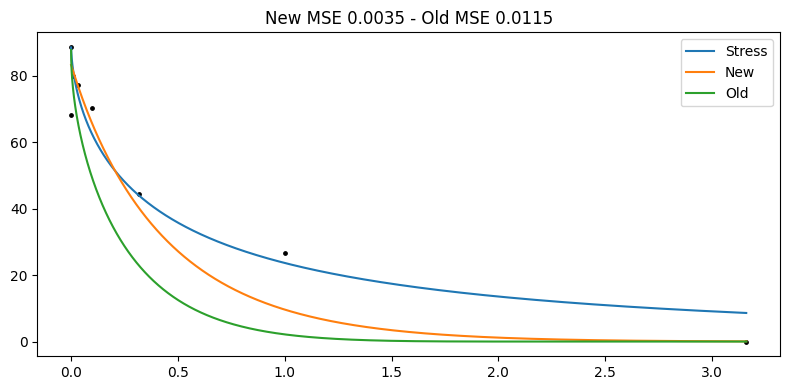

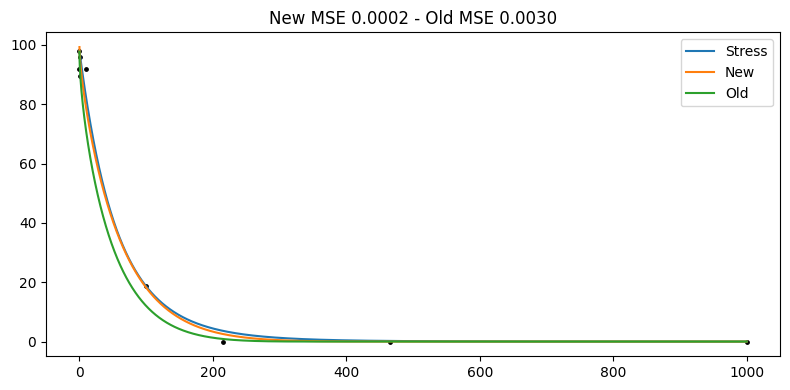

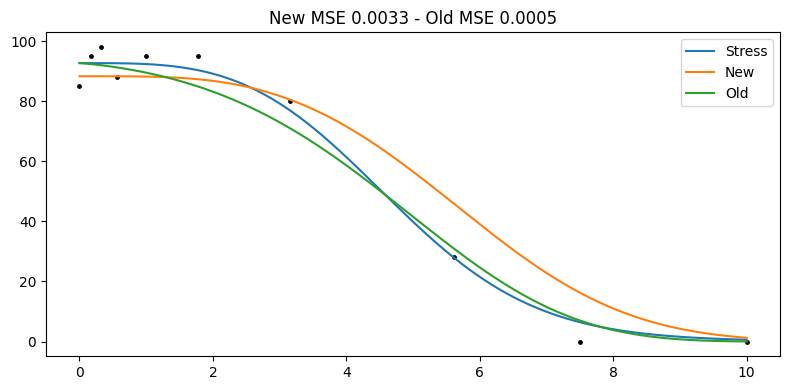

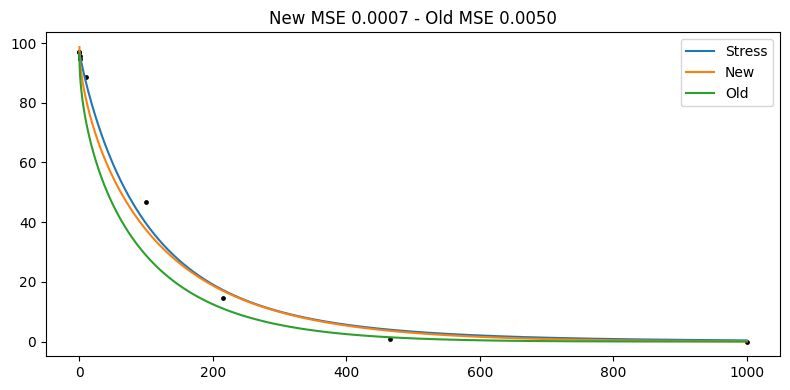

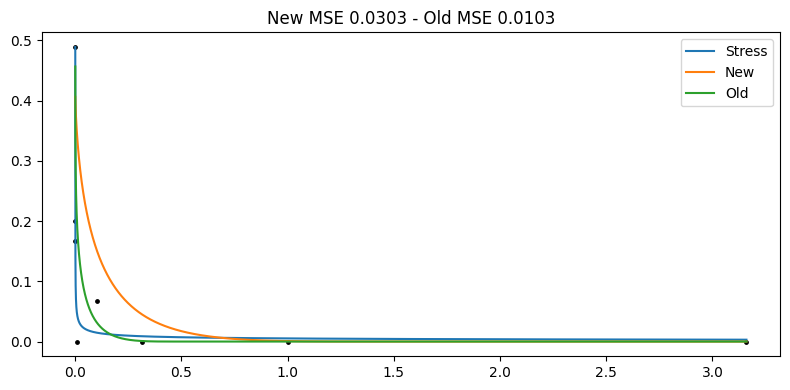

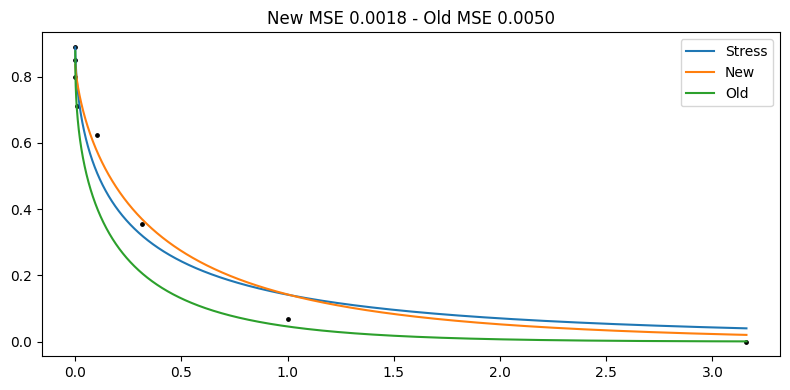

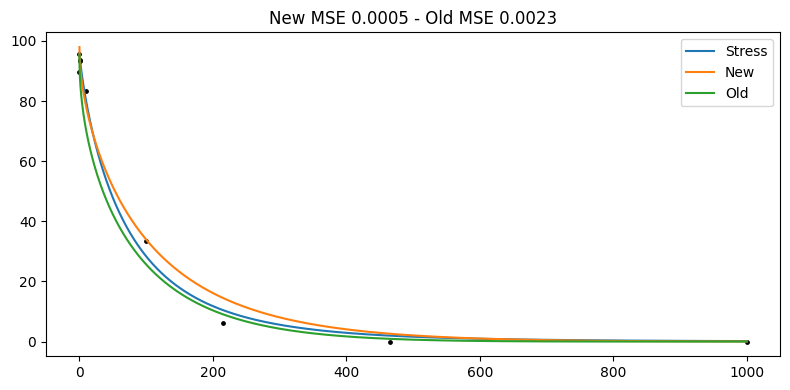

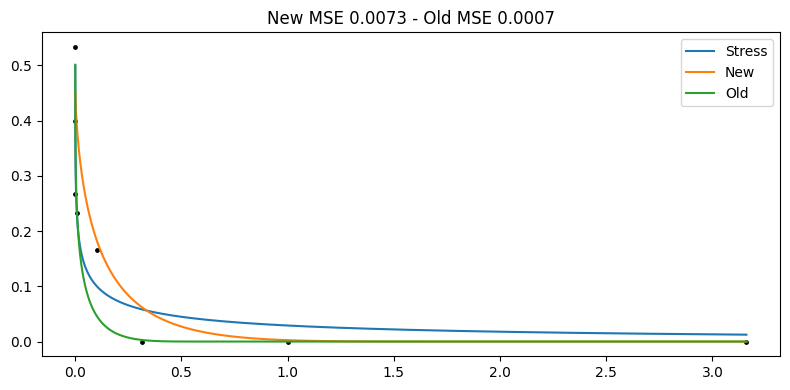

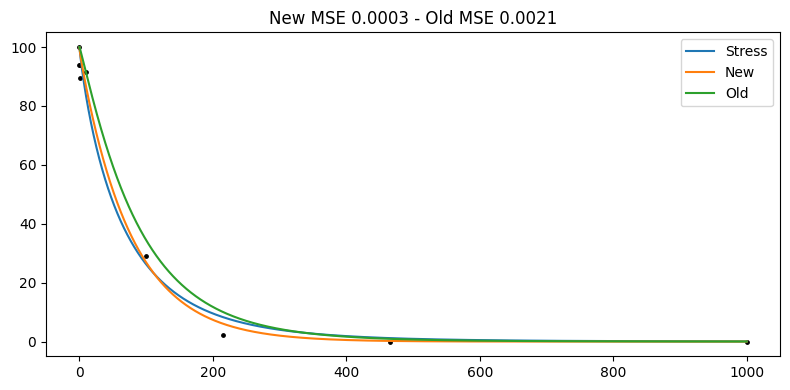

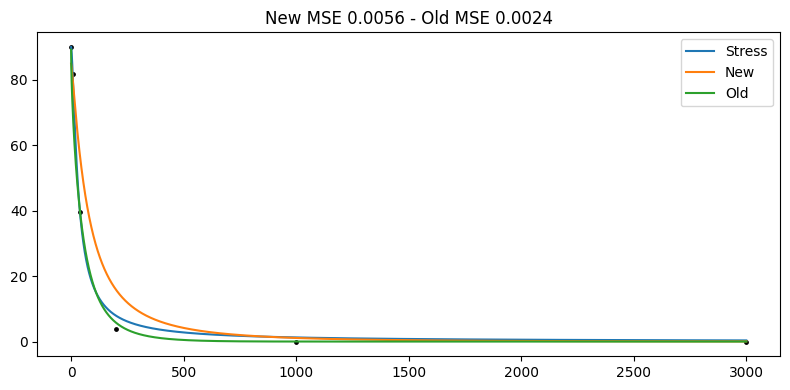

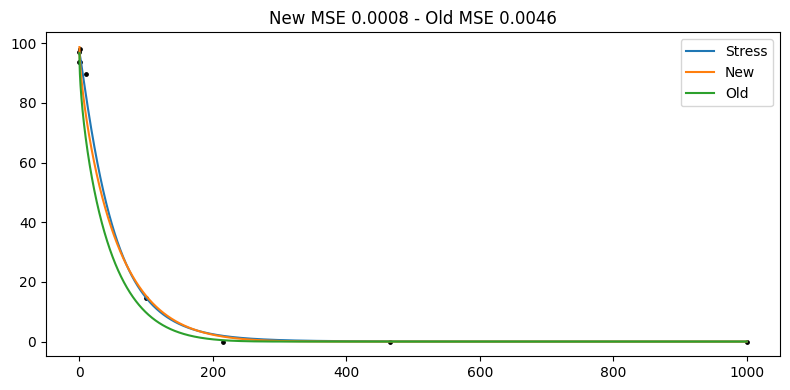

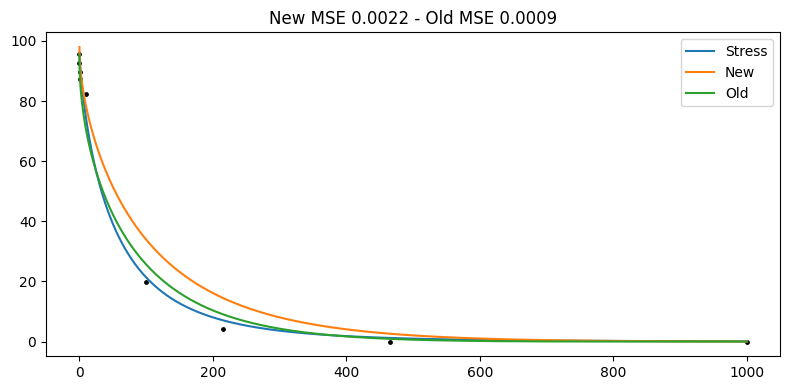

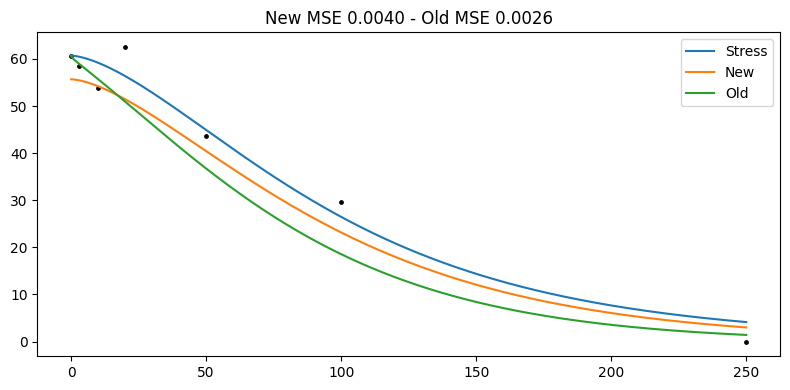

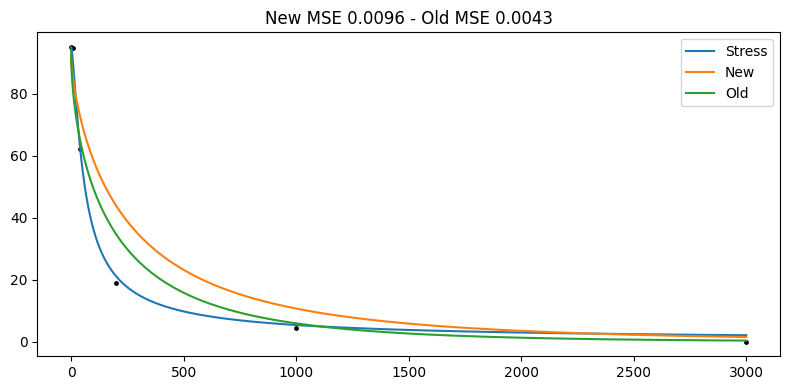

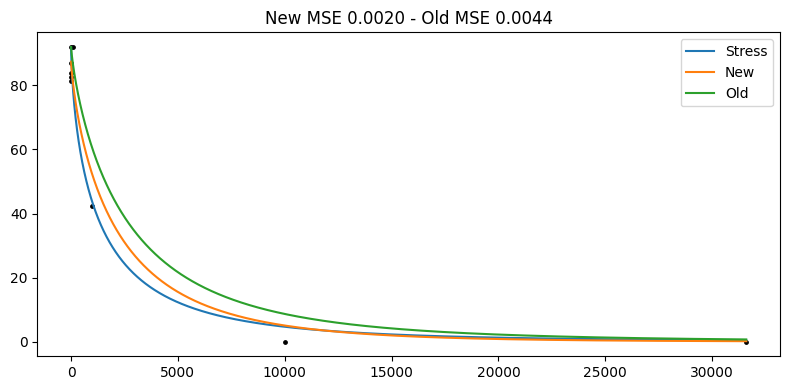

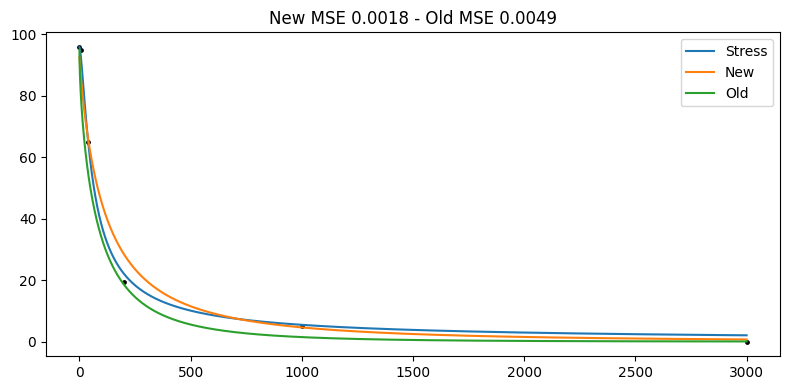

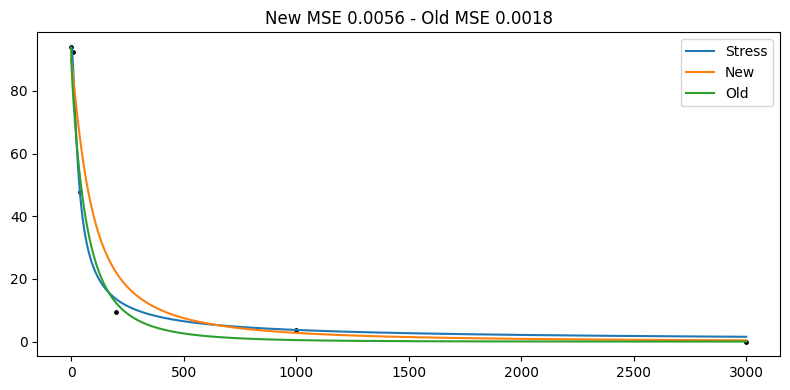

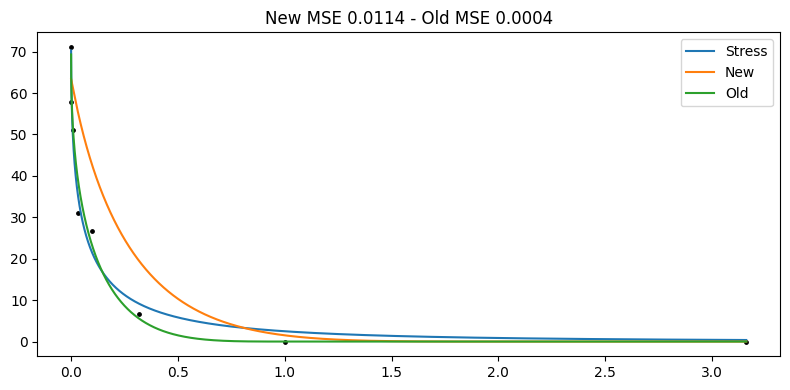

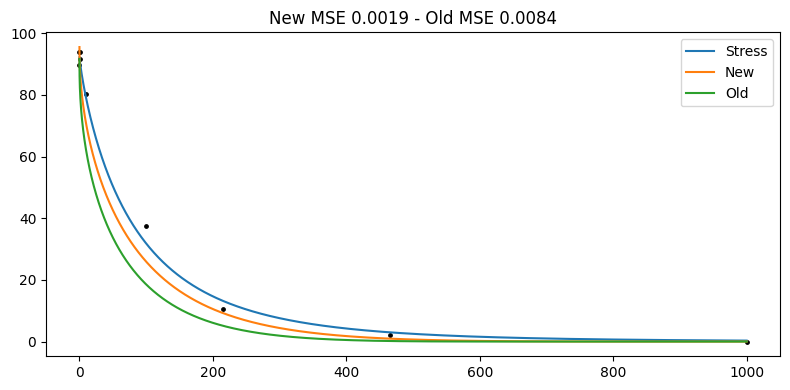

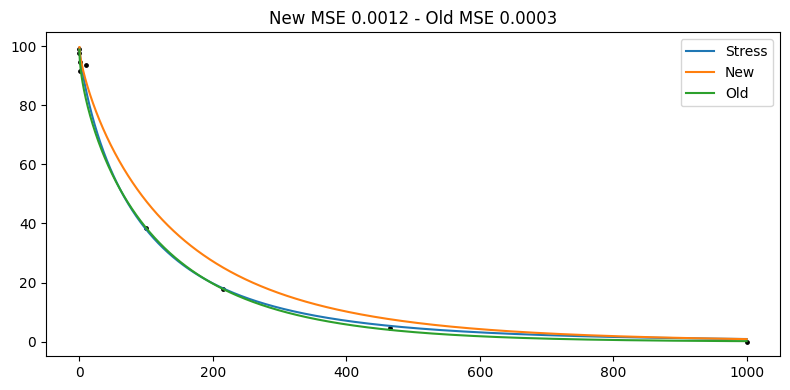

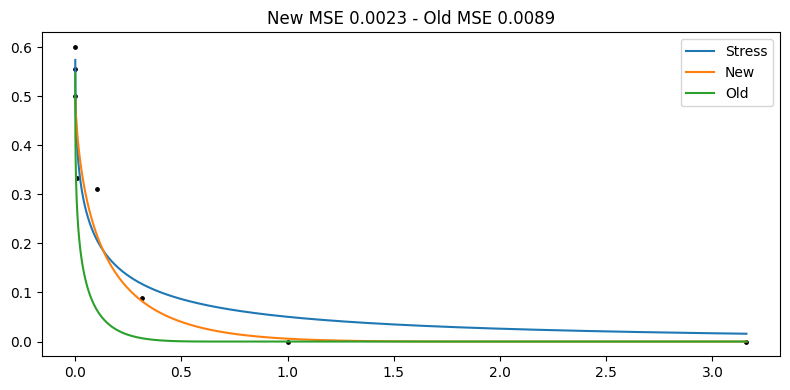

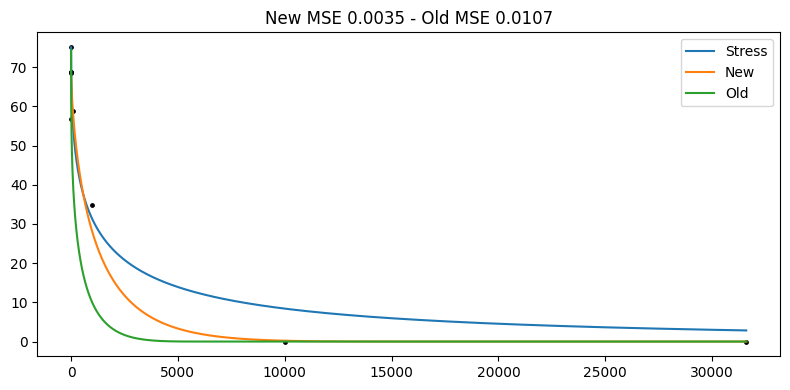

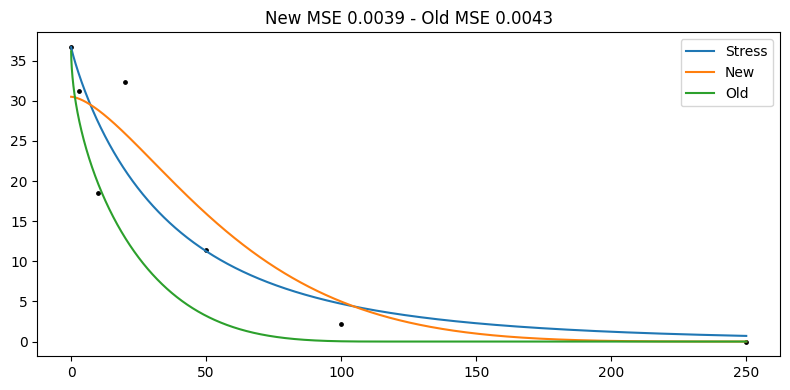

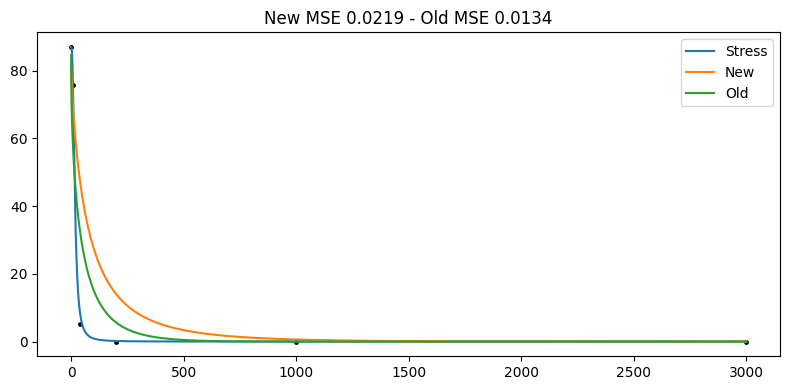

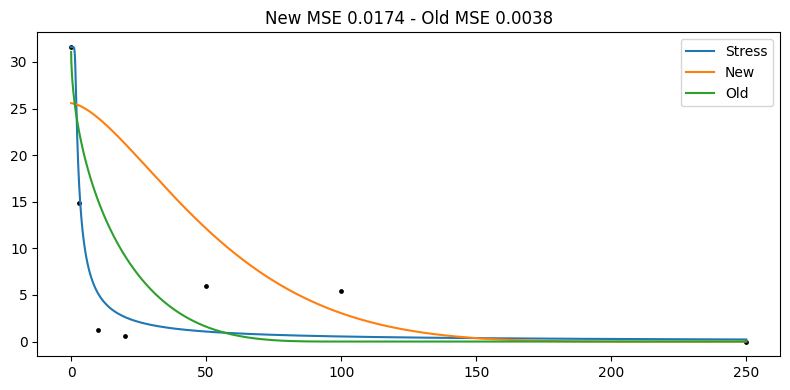

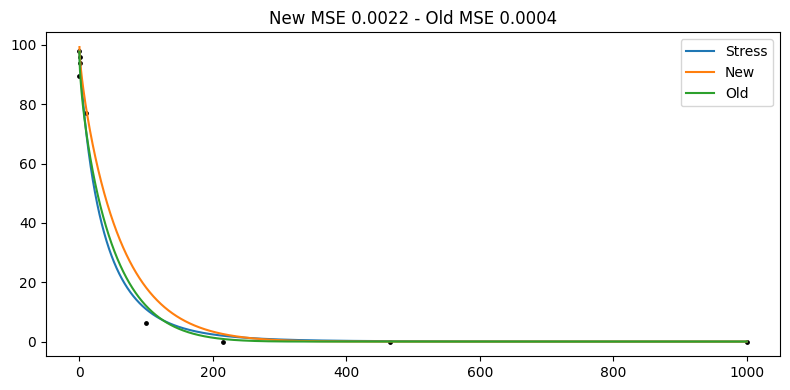

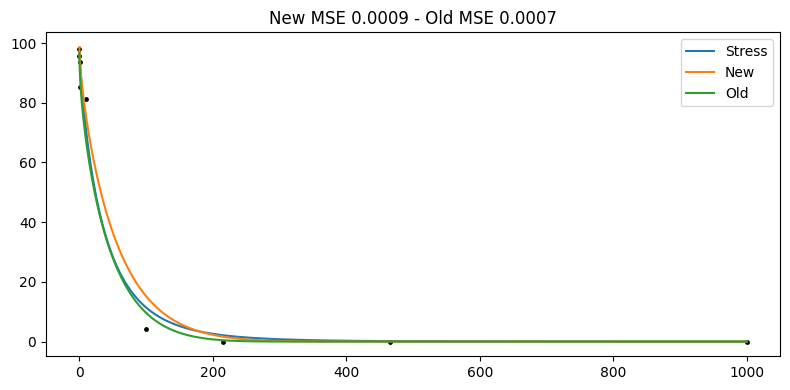

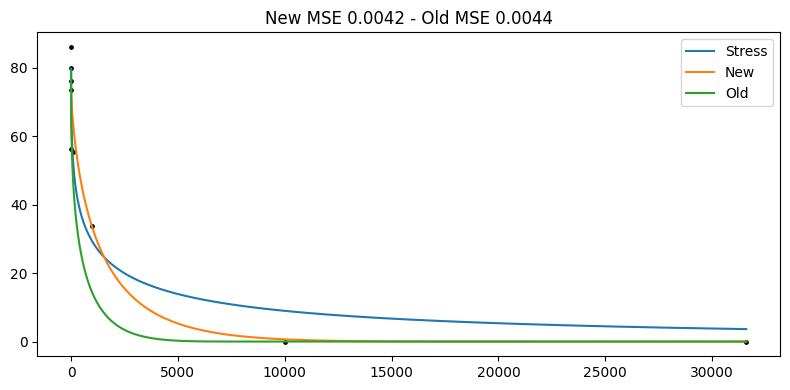

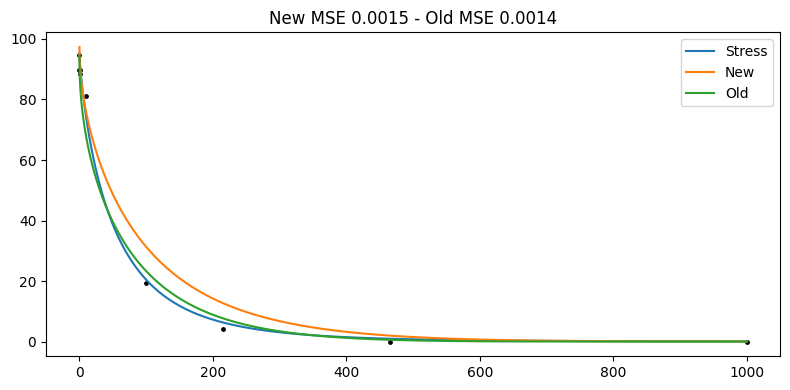

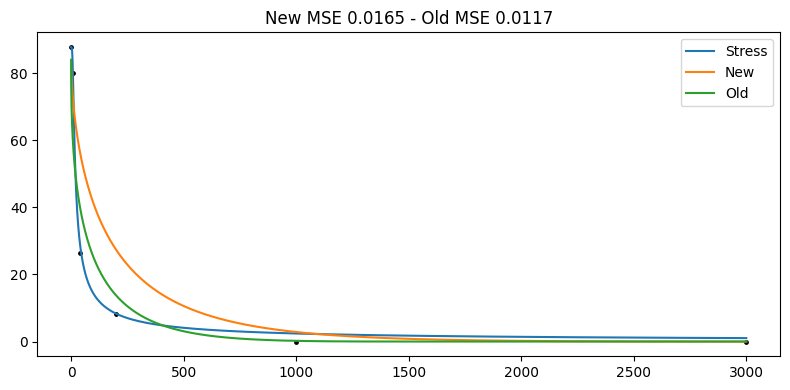

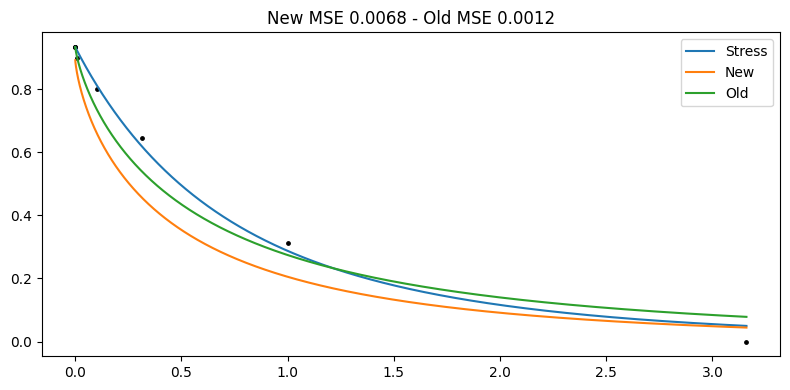

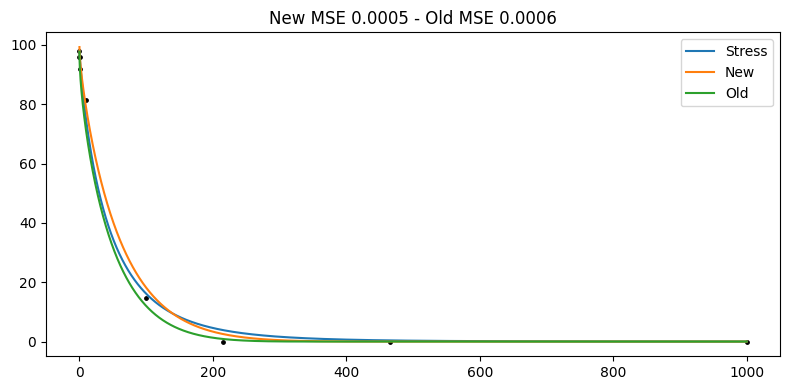

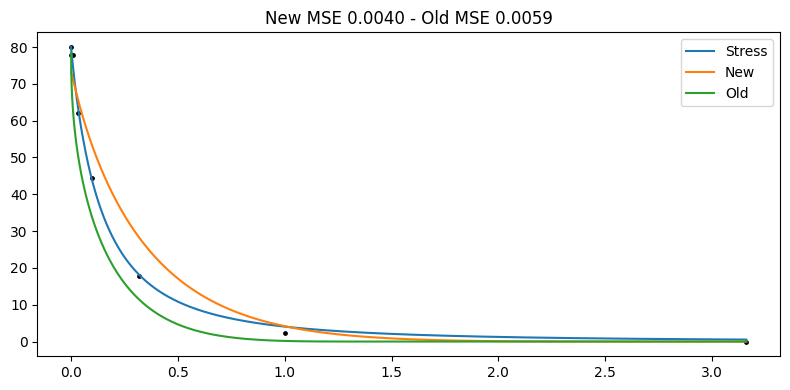

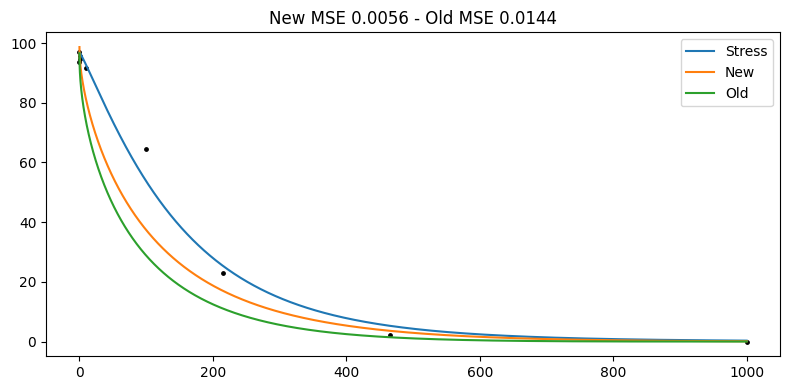

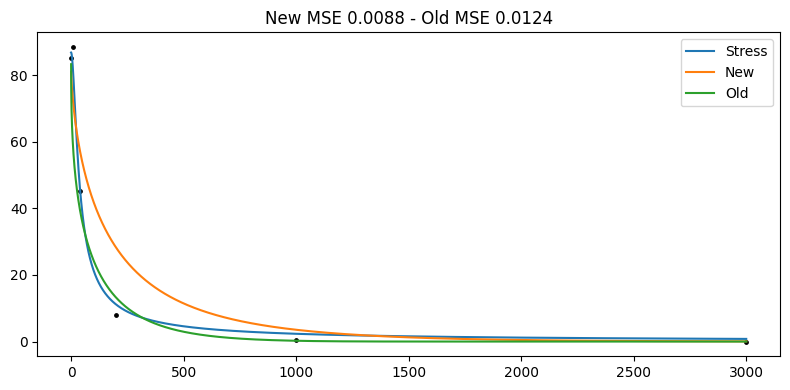

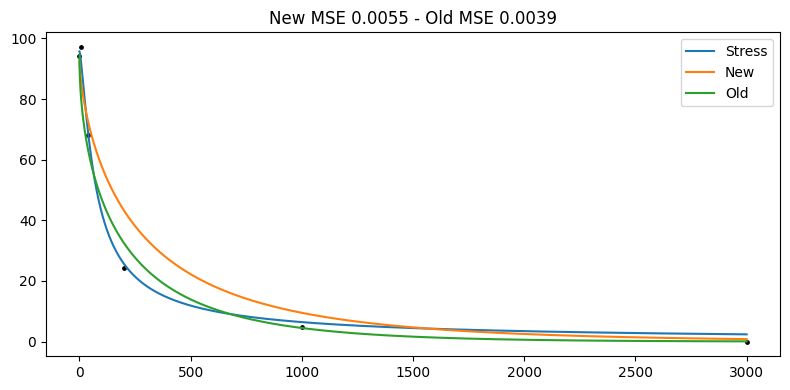

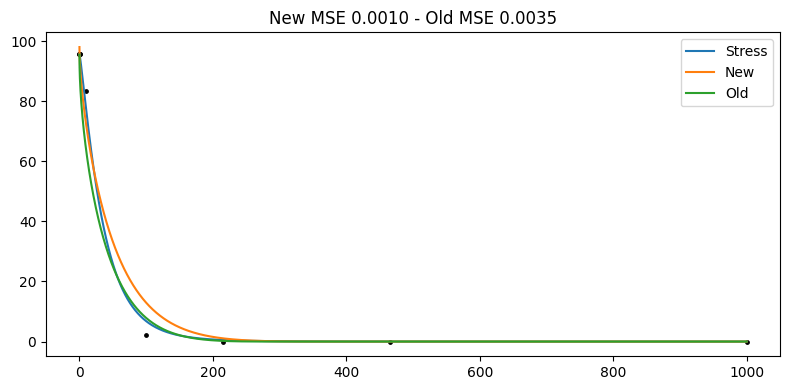

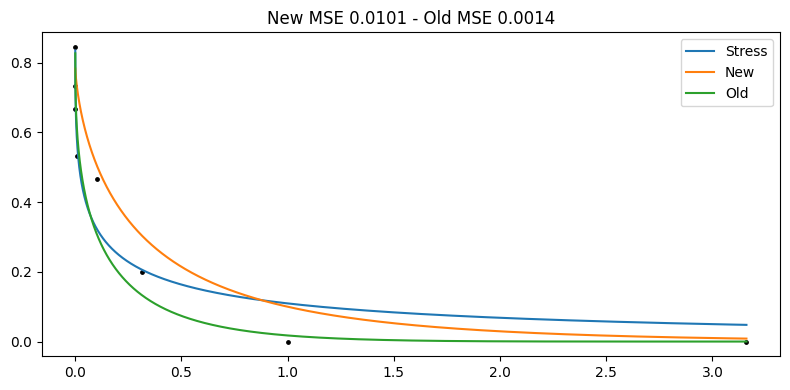

In [39]:
def plot_diff(path):
    new = pd.read_csv(f"migration/new_standard/{path}", index_col=0)
    old = pd.read_csv(f"migration/old_standard/{path}", index_col=0)
    marco = pd.read_csv(f"migration/python_marco/{path}")

    data = read_data(new.path.iloc[0])
    main_series = data.main_series
    exp_name = new.exp_name.iloc[0]
    exp_series = data.additional_stress[exp_name]

    
    dfs = {"New":new, "Old":old, }

    fig = plt.figure(figsize=(8, 4))
    plt.scatter(exp_series.concentration, exp_series.survival_rate, c = "black", s= 6)

    plt.plot(new.Concentration, new.Survival_B, label = "Stress")
    for name, df in dfs.items():
        plt.plot(df.Concentration, df.SAM, label = name)
    
    
    # plt.set_title("SAM")
    
    mse = lambda a,b : float(np.square(a / data.meta.max_survival-b/ data.meta.max_survival).mean())
    new_mse = mse(new.Survival_B, new.SAM)
    old_mse = mse(old.Survival_B, old.SAM)
    plt.title(f"New MSE {new_mse :.4f} - Old MSE {old_mse :.4f}")
    
    plt.legend()
    plt.tight_layout()
    plt.show()
    plt.close()


for p in files:
    plot_diff(p)
